# Assignment 2

### CS2545 - Data Science ###
### Fall, 2021 ###
### UNB, Fredericton ###

**Notebook:** Complete the assignment and submit the .ipynb file (with filename changed to **Assignment02_LastName_FirstName.ipynb**) to D2L. <br>
<br>
**Deadline:** 5:00 pm, December 9, 2021
<br>
<br>
**Submission guidelines:** <br>
•	Late assignments will not be marked, except if alternate arrangements have been approved by the instructor. <br>
•	Assignment components that are required to be submitted electronically via D2L, and are not submitted via D2L, will not be marked. <br>

**Note about plagiarism:** <br>
Any assignments that appear to be in violation of an academic offence (plagiarism) will be reported to the Registrar’s Office as per UNB regulations (See section VII of UNB Undergraduate Calendar). <br>


**Task and Dataset** 

For this assignment you will analyze Spotify datasets and perform music related analysis. You will find the following 3 files  in the datasets.zip file from D2L:

- *artists.csv*
- *albums.csv*
- *tracks.csv*

You may want to first open the files with a text editor and observe the files carefully, to get an idea about the fields in the data table. The meaning of each column label is self-explanatory.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import thinkstats2
import thinkplot
%matplotlib inline


**Q1** Load the 3 data files (mentioned above) as dataframes: *artists_df*, *albums_df* and *track_df* respectively. 

Then, show the first 5 records of the dataframes.

In [3]:
# load artists_df  dataframe

artists_df = pd.read_csv('artists.csv')
artists_df.head()


,artist_id,artist_popularity,followers,genres,artist_name
0,4mGnpjhqgx4RUdsIJiURdo,44,23230,"['sertanejo', 'sertanejo pop', 'sertanejo trad...",Juliano Cezar
1,1dLnVku4VQUOLswwDFvRc9,22,313,[],The Grenadines
2,6YVY310fjfUzKi8hiqR7iK,26,1596,['danish pop rock'],Gangway
3,2VElyouiCfoYPDJluzwJwK,31,149,['uk alternative pop'],FADES
4,4agVy03qW8juSysCTUOuDI,21,11,['french baroque'],Jean-Pierre Guignon


In [4]:
# load albums_df  dataframe

albums_df = pd.read_csv('albums.csv')
albums_df.head()

,album_id,album_type,artist_id,album_name,release_date,release_date_precision,total_tracks
0,1gAM7M4rBwEbSPeAQR2nx1,single,3DiDSECUqqY1AuBP8qtaIa,If I Ain't Got You EP,2/8/2019,day,6
1,4KfJZV7WfolYlxBzOTo66s,album,6s1pCNXcbdtQJlsnM1hRIA,Shostakovich Symphony No.5 - Four Romances on ...,3/1/2019,day,8
2,7nLYY7uAVUb57kpd7tZxnS,single,5YjfNaHq05WrwldRe1QSBc,Take My Bass,3/14/2019,day,1
3,6p20Rt4x2Qn5mUMRi1s6pj,single,2G9Vc16JCpnZmK4uGH46Fa,Hypnotizing (Are U),11/16/2016,day,1
4,1XeoOqC1q7U2iyLEQJ64cu,single,2dwM9OcE4c3Ph1UBINSodx,Sunshine,7/20/2018,day,1


In [5]:
# load tracks_df  dataframe
tracks_df = pd.read_csv('tracks.csv')
tracks_df.head()


,track_id,album_id,artists_id,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,track_name_prev,track_number
0,5qljLQuKnNJf4F4vfxQB0V,0D3QufeCudpQANOR7luqdr,['3mxJuHRn2ZWD5OofvJtDZY'],28,0.294,0.698,235584,0.606,0.151,-7.447,0.0262,115.018,0.6220,track_14,1
1,3VAX2MJdmdqARLSU5hPMpm,1bcqsH5UyTBzmh9YizdsBE,['4xWMewm6CYMstu0sPgd9jJ'],31,0.863,0.719,656960,0.308,0.253,-10.340,0.9220,115.075,0.5890,track_3,3
2,1L3YAhsEMrGVvCgDXj2TYn,4tKijjmxGClg4JOLAyo2qE,['3hYaK5FF3YAglCj5HZgBnP'],31,0.750,0.466,492840,0.931,0.938,-13.605,0.9440,79.565,0.0850,track_4,4
3,6aCe9zzoZmCojX7bbgKKtf,6FeJF5r8roonnKraJxr4oB,['2KQsUB9DRBcJk17JWX1eXD'],14,0.763,0.719,316578,0.126,0.113,-20.254,0.9380,112.822,0.5330,track_9,1
4,1Vo802A38tPFHmje1h91um,4tKijjmxGClg4JOLAyo2qE,['3hYaK5FF3YAglCj5HZgBnP'],32,0.770,0.460,558880,0.942,0.917,-13.749,0.9430,81.260,0.0906,track_2,2


**Q1.1** Merge the *artists_df* and *albums_df*  dataframes and name the new dataframe *art_alb_df* and show the first 5 rows.

In [6]:
# your code 
art_alb_df = pd.merge(artists_df, albums_df)
art_alb_df.head()


,artist_id,artist_popularity,followers,genres,artist_name,album_id,album_type,album_name,release_date,release_date_precision,total_tracks
0,4mGnpjhqgx4RUdsIJiURdo,44,23230,"['sertanejo', 'sertanejo pop', 'sertanejo trad...",Juliano Cezar,2tx2zEr2JUKhDqnRlWQdzR,album,É Isso Que A Galera Quer,9/1/2006,day,15
1,4mGnpjhqgx4RUdsIJiURdo,44,23230,"['sertanejo', 'sertanejo pop', 'sertanejo trad...",Juliano Cezar,2zmd7Bn7in6CrgdHpFvU0b,album,Sucessos de Juliano Cézar,8/1/2013,day,15
2,1dLnVku4VQUOLswwDFvRc9,22,313,[],The Grenadines,5YEORJnaovJcPqKNhlIQlx,album,Band on the Radio,11/16/2018,day,10
3,6YVY310fjfUzKi8hiqR7iK,26,1596,['danish pop rock'],Gangway,65CsTqUbM5RH0jFRZdIygK,album,Happy Ever After,9/17/1992,day,12
4,2VElyouiCfoYPDJluzwJwK,31,149,['uk alternative pop'],FADES,7Jbgxp7IqL09ODxOPYJJkv,single,Wasted,2/22/2019,day,1


**Q1.2** Show the name of the artists and number of albums for the top 20 artists with the most number of albums (**not singles**). 

In [7]:
# your code 

grouped = art_alb_df[art_alb_df["album_type"]!="single"].groupby("artist_name")
grouped["album_id"].count().sort_values(ascending=False).head(20)

artist_name
Various Artists            2227
Johann Sebastian Bach        83
Frédéric Chopin              59
Wolfgang Amadeus Mozart      56
Johnny Cash                  45
Ludwig van Beethoven         37
Jean Sibelius                33
A.R. Rahman                  31
Franz Schubert               30
Aretha Franklin              30
Franz Joseph Haydn           29
Johannes Brahms              27
Roberto Carlos               26
Laura Pausini                26
Luis Miguel                  26
8-Bit Misfits                25
Pritam                       25
Bob Dylan                    24
George Frideric Handel       24
José José                    23
Name: album_id, dtype: int64

**Q1.3** How many singles and how many albums were released by Alicia Keys since 2010 (inclusive). 

Note that the release date of albums can be a year or a particular date.

In [8]:
# your code 
import datetime

formarted_year = pd.merge(artists_df, albums_df)
f = lambda x : x[-4:] if len(x) > 4 else x

formarted_year["release_date"] = formarted_year["release_date"].map(f);

formarted_year[(formarted_year["release_date"] >= "2010") & 
               (formarted_year["artist_name"] == "Alicia Keys")].groupby("album_type")["album_id"].count()

album_type
album     2
single    7
Name: album_id, dtype: int64

In [9]:
# intentionally left blank

**Q2.1** Who are the top 5 artists with the most popularity? Do these artists have the most followers? If the lists of artists differ, what does that mean? 

Use *artists_df* to answer this question.

In [10]:
# your code for  top 5 artists with the most popularity
artists_df.sort_values(by=['artist_popularity'], ascending=False).head(5)[["artist_name","artist_popularity","followers"]]


,artist_name,artist_popularity,followers
42872,Ariana Grande,100,26309771
53392,Drake,98,34680740
49775,Post Malone,96,12150628
55822,XXXTENTACION,95,11564320
49695,Juice WRLD,95,3607186


In [11]:
# your code for artists having the most followers
artists_df.sort_values(by=['followers'], ascending=False).head(5)[["artist_name","artist_popularity","followers"]]


,artist_name,artist_popularity,followers
55251,Ed Sheeran,92,41561693
53392,Drake,98,34680740
52620,Rihanna,90,30560149
54447,Justin Bieber,88,26824224
42872,Ariana Grande,100,26309771


**Answer:** The two lists have overlap but does not match perfectly. This probably means that the popularity does not toally depends on the numbers of followers.

**Q2.2** Using *artists_df* create a list called *genres* containing all possible values within the "genre" column. This list must contain only unique values.

*Hint*: the genres column contains strings, not lists.

In [12]:
# your code
genres_set = set()
for each in artists_df["genres"]:
    temp = eval(each)
    for item in temp:
        genres_set.add(item)

**Q2.3** Using *artists_df* create 5 new dataframes *pop_df*, *rock_df*, *jazz_df*, *indie_df* and *hiphop_df*. If the genre of a track **contains** the word "pop" (such as, in "danish pop rock"), add it to the *pop_df*. Do this (i.e. create the corresponding dataframes) in a  similar way for other genres.


In [13]:
# your code

pop_df = artists_df[artists_df["genres"].str.contains("pop")]
rock_df = artists_df[artists_df["genres"].str.contains("rock")]
jazz_df = artists_df[artists_df["genres"].str.contains("jazz")]
indie_df = artists_df[artists_df["genres"].str.contains("indie")]
hiphop_df = artists_df[artists_df["genres"].str.contains("hip hop")]

hiphop_df.head()

,artist_id,artist_popularity,followers,genres,artist_name
17,4sH7SLGP6BLOYDtcP6Lm47,46,30344,['abstract hip hop'],P.O.S
26,6PWRJs1FosHp8Cqx0Nmswj,44,29230,"['abstract hip hop', 'experimental hip hop', '...",Astronautalis
114,6TeJpqb3PcvfHxjKAEKCNu,49,31182,"['dark trap', 'emo rap', 'underground hip hop']",PRXJEK
144,05X5qdeeGgBQe115bTNlWu,43,13533,"['danish hip hop', 'danish pop']",Pede B
200,7iy8L2sZVT2ae2pWZWadrs,7,302,['belgian hip hop'],Masai Jr


**Q2.4** For each of the 5 categories from Q2.3, plot the boxplots of the artist popularity in a single plot. Which genre has the highest median artist popularity and which boxplot looks like it has the lowest number of outliers? How do you know?

Text(0.5, 0.98, 'Artist Popularity by Genres')

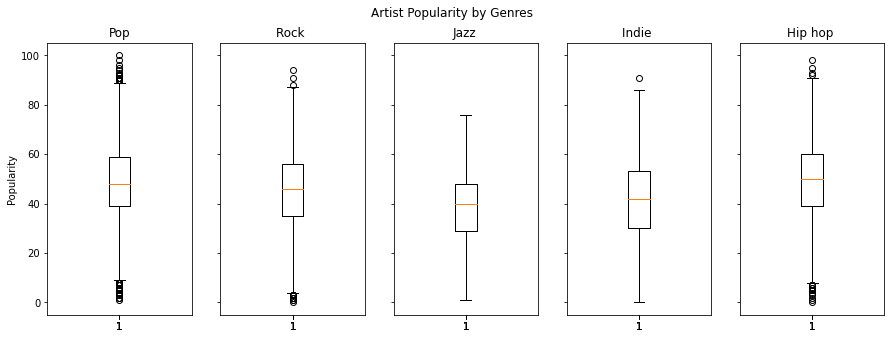

In [14]:
# your code
f, axes = plt.subplots(1,5, sharex=True, sharey=True, figsize=(15, 5))

axes[0].boxplot(pop_df['artist_popularity'])
axes[1].boxplot(rock_df['artist_popularity'])
axes[2].boxplot(jazz_df['artist_popularity'])
axes[3].boxplot(indie_df['artist_popularity'])
axes[4].boxplot(hiphop_df['artist_popularity'])

axes[0].set_title('Pop')
axes[0].set_ylabel("Popularity")
axes[1].set_title('Rock ')
axes[2].set_title('Jazz ')
axes[3].set_title('Indie ')
axes[4].set_title('Hip hop ')

plt.suptitle('Artist Popularity by Genres')


**Answer:** By lokking at the boxplot. Hip hop has the highest median(the middle orange line), and jass has least outliers(lowest upper whisker).

**Q2.5** For each of the 5 categories from Q2.3, plot a bar chart of the number of followers per given genre (pop, rock, jazz, indie and hip hop) in a single plot. Which genre has the most followers? Which one has the least?

<BarContainer object of 5 artists>

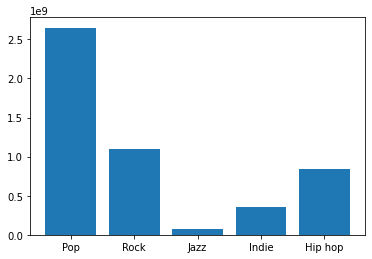

In [15]:
# your code

x_genres = ["Pop", "Rock", "Jazz", "Indie", "Hip hop"]
y_total_followers = [pop_df['followers'].sum(), rock_df['followers'].sum(), jazz_df['followers'].sum(), indie_df['followers'].sum(), hiphop_df['followers'].sum()]
plt.bar(x_genres,y_total_followers)


**Answer:** Pop has most followers and jazz has the least.

In [16]:
# intentionally left blank

**Q3.1** Using *artists_df* create a new dataframes *nogenre_df*. If the genre of a track **contains** is an empty list ('[]'), add it to the dataframe. Display the first 5 values of the dataframe.

*Hint*: the genres column contains strings, not lists.

In [17]:
# your code

nogenre_df = artists_df[artists_df["genres"] == '[]']
nogenre_df.head()


,artist_id,artist_popularity,followers,genres,artist_name
1,1dLnVku4VQUOLswwDFvRc9,22,313,[],The Grenadines
5,38VBjthd0szbS6wpDMafrb,43,81,[],Filhos
6,36mHwYa65L0WZbAXY2iSGw,34,8358,[],Eloq
7,1jJyy00XfxjB4tMAv5OT0q,7,158,[],Fravær
8,10A8WbBJ0zW8MnvTsUL6os,21,30,[],Camille Pépin


**Q3.2** In a single plot, show 6 Probability Mass Functions (PMF), as step functions, of the artist popularity for the genres from question *Q2.3* and the *nogenre_df* created in *Q3.1*.


*Hint*: Refer to lecture notes on *_Statistics.pdf to see how to plot PMFs. 

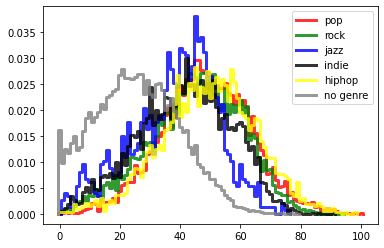

<Figure size 576x432 with 0 Axes>

In [18]:
# your code 

pop_pmf = thinkstats2.Pmf(pop_df["artist_popularity"], label = "pop")
rock_pmf = thinkstats2.Pmf(rock_df["artist_popularity"], label = "rock")
jazz_pmf = thinkstats2.Pmf(jazz_df["artist_popularity"], label = "jazz")
indie_pmf = thinkstats2.Pmf(indie_df["artist_popularity"], label = "indie")
hiphop_pmf = thinkstats2.Pmf(hiphop_df["artist_popularity"], label = "hiphop")
nogenre_pmf = thinkstats2.Pmf(nogenre_df["artist_popularity"], label = "no genre")
thinkplot.Pmf(pop_pmf ,color = "red")
thinkplot.Pmf(rock_pmf ,color = "green")
thinkplot.Pmf(jazz_pmf ,color = "blue")
thinkplot.Pmf(indie_pmf ,color = "black")
thinkplot.Pmf(hiphop_pmf ,color = "yellow")
thinkplot.Pmf(nogenre_pmf ,color = "gray")
thinkplot.Show()


**Q3.3** From the PMF plots, what can you infer? (Note that artist popularity is on a scale from 0-100)

**Answer:** no genre has lowest popularity and hiphop has the highest average popularity. Many artist in Jazz get around 45 popularity. Pop and Rock has very close popularity.

**Q3.4** In a single plot, show 6 Cumulative Distribution Functions (CDF) of the artist popularity for the genres from question *Q2.3* and the *nogenre_df* created in *Q3.1*.


*Hint*: Refer to lecture notes on *_Statistics.pdf to see how to plot CDFs. 

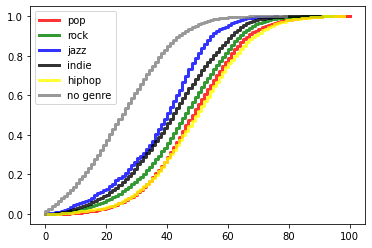

<Figure size 576x432 with 0 Axes>

In [19]:
# your code 

pop_pmf = thinkstats2.Cdf(pop_df["artist_popularity"], label = "pop")
rock_pmf = thinkstats2.Cdf(rock_df["artist_popularity"], label = "rock")
jazz_pmf = thinkstats2.Cdf(jazz_df["artist_popularity"], label = "jazz")
indie_pmf = thinkstats2.Cdf(indie_df["artist_popularity"], label = "indie")
hiphop_pmf = thinkstats2.Cdf(hiphop_df["artist_popularity"], label = "hiphop")
nogenre_pmf = thinkstats2.Cdf(nogenre_df["artist_popularity"], label = "no genre")
thinkplot.Cdf(pop_pmf ,color = "red")
thinkplot.Cdf(rock_pmf ,color = "green")
thinkplot.Cdf(jazz_pmf ,color = "blue")
thinkplot.Cdf(indie_pmf ,color = "black")
thinkplot.Cdf(hiphop_pmf ,color = "yellow")
thinkplot.Cdf(nogenre_pmf ,color = "gray")
thinkplot.Show()


**Q3.5** From the CDF plots, what can you infer? 

**Answer:** No genre has lowest popularity. hiphop,pop and rock has very close popularity. Indie is more popular than jazz.

In [20]:
# intentionally left blank

**Q4.**  Danceability  has been defined as a property that indicates how suitable a piece of music is to dance based on various audio features such as tempo, loudness, valence (i.e. musical positiveness of emotion) and speechiness etc. In the next few questions, you will try to determine the features that have the most influence on danceability.

Use *tracks_df* to answer these questions. Filter out any record with danceability 0 or less, before proceeding.

In [21]:
# reload dataframe
tracks_df = pd.read_csv('tracks.csv')
tracks_df = tracks_df[tracks_df["danceability"] > 0]
tracks_df.head()

,track_id,album_id,artists_id,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,track_name_prev,track_number
0,5qljLQuKnNJf4F4vfxQB0V,0D3QufeCudpQANOR7luqdr,['3mxJuHRn2ZWD5OofvJtDZY'],28,0.294,0.698,235584,0.606,0.151,-7.447,0.0262,115.018,0.6220,track_14,1
1,3VAX2MJdmdqARLSU5hPMpm,1bcqsH5UyTBzmh9YizdsBE,['4xWMewm6CYMstu0sPgd9jJ'],31,0.863,0.719,656960,0.308,0.253,-10.340,0.9220,115.075,0.5890,track_3,3
2,1L3YAhsEMrGVvCgDXj2TYn,4tKijjmxGClg4JOLAyo2qE,['3hYaK5FF3YAglCj5HZgBnP'],31,0.750,0.466,492840,0.931,0.938,-13.605,0.9440,79.565,0.0850,track_4,4
3,6aCe9zzoZmCojX7bbgKKtf,6FeJF5r8roonnKraJxr4oB,['2KQsUB9DRBcJk17JWX1eXD'],14,0.763,0.719,316578,0.126,0.113,-20.254,0.9380,112.822,0.5330,track_9,1
4,1Vo802A38tPFHmje1h91um,4tKijjmxGClg4JOLAyo2qE,['3hYaK5FF3YAglCj5HZgBnP'],32,0.770,0.460,558880,0.942,0.917,-13.749,0.9430,81.260,0.0906,track_2,2


**Q4.1** Plot a scatterplot of the danceability of the tracks (on the x-axis) and their tempo (on the y-axis), then calculate Pearson’s Correlation Coefficient. 

No handles with labels found to put in legend.


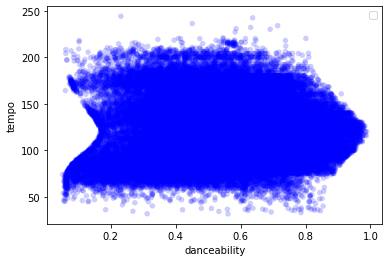

Pearson’s Correlation Coefficient:  -0.034808405915085376


<Figure size 576x432 with 0 Axes>

In [22]:
# your code
x = tracks_df["danceability"]
y = tracks_df["tempo"]

thinkplot.Scatter(x, y)
thinkplot.Show(xlabel='danceability',ylabel='tempo')

print("Pearson’s Correlation Coefficient: ",thinkstats2.Corr(x,y))

**Q4.2** Plot a scatterplot of the danceability of the tracks (on the x-axis) and their valence (on the y-axis), then calculate Pearson’s Correlation Coefficient. 

No handles with labels found to put in legend.


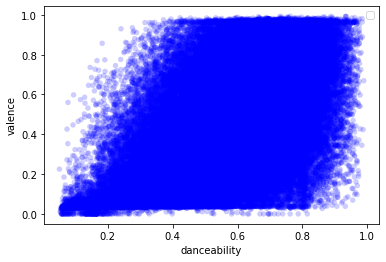

Pearson’s Correlation Coefficient:  0.5163542935179827


<Figure size 576x432 with 0 Axes>

In [23]:
# your code
x = tracks_df["danceability"]
y = tracks_df["valence"]

thinkplot.Scatter(x, y)
thinkplot.Show(xlabel='danceability',ylabel='valence')

print("Pearson’s Correlation Coefficient: ",thinkstats2.Corr(x,y))


**Q4.3** Plot a scatterplot of the danceability of the tracks (on the x-axis) and their loudness (on the y-axis), then calculate Pearson’s Correlation Coefficient. 

No handles with labels found to put in legend.


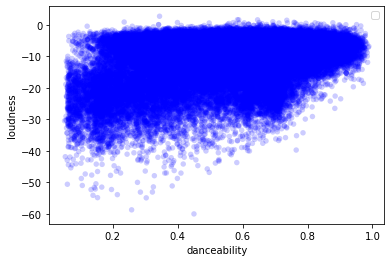

Pearson’s Correlation Coefficient:  0.33414950788542813


<Figure size 576x432 with 0 Axes>

In [24]:
# your code
x = tracks_df["danceability"]
y = tracks_df["loudness"]

thinkplot.Scatter(x, y)
thinkplot.Show(xlabel='danceability',ylabel='loudness')

print("Pearson’s Correlation Coefficient: ",thinkstats2.Corr(x,y))


**Q4.4** From the above plots, what can you infer? Which feature of a track has the most influence on its danceability?

**Answer:**  The tempo does not have much influence on a track's danceability. Valence has the most positive(higher valence gives higher danceability) influence on its danceability, and then loudness also has a positive influence on danceability.